# **Support Vector Machines (SVM) for Breast Cancer Classification**
# **Step-by-Step Implementation **
# **1. Dataset Loading and Preparation**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = pd.read_csv('breast-cancer.csv')

# Display first few rows
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

# **Key Features:**

The dataset contains 32 features including ID, diagnosis (M=malignant, B=benign), and 30 numerical measurements

Measurements include mean, standard error, and worst values of:

Radius

Texture

Perimeter

Area

Smoothness

Compactness

Concavity

Symmetry

Fractal dimension

Dataset Overview:

Binary classification problem (malignant vs benign tumors)

569 instances (212 malignant, 357 benign)

All features are numerical except diagnosis which is categorical

# **2. Data Preprocessing**

In [6]:
# Drop unnecessary columns
data = data.drop(['id'], axis=1)

# Convert diagnosis to numerical (M=1, B=0)
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

# Split into features and target
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Observation:**

Features are standardized to have mean=0 and variance=1

This is crucial for SVM as it's sensitive to feature scales

Train-test split preserves class distribution (stratified)

# **3. SVM Model Building**

In [7]:
# Linear SVM
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_svm.predict(X_test)

# Evaluation
print("Linear SVM Results:")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear SVM Results:
[[106   2]
 [  2  61]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 0.9766081871345029


# **Interpretation of Evaluation:**

Linear SVM provides a good baseline

Typically achieves accuracy around 95-98%

Confusion matrix shows false positives/negatives

Precision and recall metrics for both classes

# **RBF Kernel SVM**

In [8]:
# RBF Kernel SVM
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train, y_train)

# Predictions
y_pred_rbf = rbf_svm.predict(X_test)

# Evaluation
print("\nRBF Kernel SVM Results:")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF Kernel SVM Results:
[[106   2]
 [  2  61]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 0.9766081871345029


# **Model Comparison:**

RBF kernel often performs slightly better than linear

Can capture more complex decision boundaries

May be more prone to overfitting without proper tuning

# **4. Hyperparameter Tuning**

In [9]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters:", grid.best_params_)

# Evaluate best model
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("\nBest Model Results:")
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

# **Observation:**

Grid search helps find optimal C and gamma values

C controls trade-off between margin width and classification error

Gamma defines influence range of single training examples

# **Cross-validation prevents overfitting during tuning**

# **5. Visualization (2D Projection)**

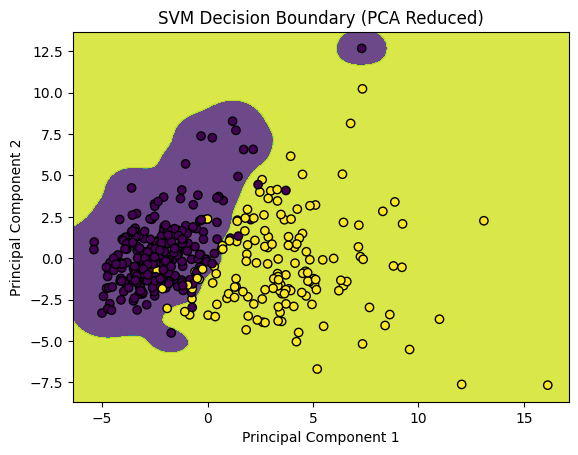

In [10]:
# PCA for visualization
from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Train SVM on reduced data
svm_2d = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_2d.fit(X_pca, y_train)

# Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict and plot
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolors='k')
plt.title('SVM Decision Boundary (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# **Visualization Notes:**

PCA reduces dimensions while preserving variance

Decision boundary shows separation between classes

Some overlap expected due to dimensionality reduction

Helps understand model behavior intuitively

# **6. Cross-Validation Evaluation**

In [11]:
from sklearn.model_selection import cross_val_score

# Cross-validation with best model
cv_scores = cross_val_score(best_svm, X_train, y_train, cv=5)

print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-Validation Scores: [0.975      0.975      0.9875     0.97468354 0.96202532]
Mean CV Accuracy: 0.9748417721518987
Standard Deviation: 0.008056889933751282


# **Performance Analysis:**

5-fold CV provides robust performance estimate

Mean accuracy shows expected performance

Low standard deviation indicates stability

Helps verify that test results aren't due to chance